# Bisection Method

Assume that $f(x)$ is continuous on a given interval $\left[a, b \right]$ and that is also satisfies

$$
f(a) \cdot f(b) < 0
$$

as to say that the result of $f(a)$ times $f(b)$ have to have opposite signs as to satisfy their multiplications to be negative. 

Using the intermediate value theorem, the function $f(x)$ must have at least one root in $[a, b]$: in this case a root value k where  $a \le k \le b$ and $f(k) = 0$. This is why you must pick two numbers $a$ and $b$ with opposite signs $[-, +]$. 

In [2]:
from math import pow, exp, sin
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def f(n):
    return np.exp(-n/5) - np.sin(n)

### Graph of the Function

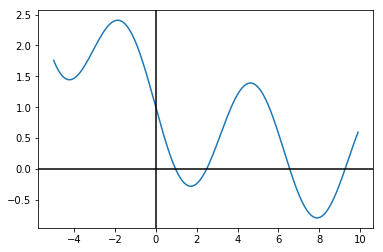

In [6]:
t1 = np.arange(-5, 10, 0.1)
plt.plot(t1, f(t1))

plt.axhline(0, color='black')
plt.axvline(0, color='black')

### Find Roots

The interval $[a, b]$ is halved in size for every pass through the algorithm. Because of line 17 through 19 on the code below, $[a, b]$ will always contain a root of $f(x)$. Since a root $\alpha$ is in the range of $[a, b]$, it must lie within either $[a, c]$ or $[c, b]$; and consequently

$$
| \ c - \alpha \ | \ge b - c = c - a
$$

This is justficiation for the test on line 14. On completion of the algortihm, $c$ will be an approximation to the root with 

$$
| \ c - \alpha \ | \le \epsilon
$$

In [7]:
def bisect(f, a, b, e):
    """ Bisection Method

    inputs:
    f - a function.
    a - Starting interval
    b - Ending interval
    e - Acceptable value for 0; (e.g. consider 0.001 == 0)
    """

    iterations = 0
    while(True):
        c = (a + b)/2
        if b - c <= e:
            print('Iterated:', iterations, 'times.')
            return c
        elif f(b)*f(c) <= 0:
            a = c
        else:
            b = c
        iterations += 1

In [9]:
r = [0, 2, 6, 9, 10]
# Using the bisection method between the ranges [0, 2], [2, 6], etc. to find all roots. 
# Utilizing estimation given by the graph above.
for i in range(len(r)-1):
    print('f(0) =', bisect(f, r[i], r[i+1], 10**(-7)))

Iterated: 24 times.
f(0) = 0.968319833278656
Iterated: 25 times.
f(0) = 2.4880810379981995
Iterated: 24 times.
f(0) = 6.556052416563034
Iterated: 23 times.
f(0) = 9.267439901828766


### Speed Convergence

To examine the speed of convergence, let $c_n$ denote the nth value of $c$ in the algorithm. Then it is easy to see that

$$
\alpha = \lim_{n \to \infty} c_n \\
|\alpha - c_n| \le \left[ \frac{1}{2} \right]^n (b - a)
$$

Where $b - a$ denotes the length of the original interval input _Bisect_. Using the variant (2.0.14) for defining linear convergence, we say that the bisection method converges linearly with a rate of $t$. The actual error may not decrease by a factor of $\frac{1}{2}$ at each step, but the average rate of decrease is $\frac{1}{2}$, based on (2.1.4). The preceding example illustrates the result (2.1.4).

### Problems

1. A practical program would take account of the unit round on the machine , adjusting the given $e$ if necessary.
2. Converges very slowly when compared with the methods defined in the following sections.

### Advantages

1. Is guaranteed to converge (provided $f$ is continuous on $[a, b]$ and (2.1.1) is satisfied.
2. A resonable error bound is available.

### Misc

Methods that at every step give/upper and lower bounds on the root $\alpha$ are called **enclosure methods**. In Section 2.8, we describe an enclosure algorithm that combines the previously stated advantages of the bisection method with the faster convergence of the secant method (described in Section 2.3).

## Rate of Convergence

In numerical analysis, the speed at which a convergent sequence (a function that eventually approaches a number) approaches its limit is called the rate of convergence. Although strictly speaking, a limit does not give information about any finite first part of the sequence, the concept of rate of convergence is of practical importance when working with a sequence of successive approximations for an iterative method, as then typically fewer iterations are needed to yield a useful approximation if the rate of convergence is higher. This may even make the difference between needing ten or a million iterations.

Let the sequence $\{r_n\}$ converge to $r$. Denote the difference between $r_n$ and $r$ by $e_n$; i.e. $e_n = e_n - r$. If there exists a positive number $p \ge 1$ and a constant $c \ne 0$ such that

$$
\lim_{n \to \infty} \frac{| r_{n+1} - r|}{|r_n - r|^p} = \lim_{n \to \infty} \frac{|e_{n+1}|}{|e_n|^p} = c
$$

the $p$ is called the order of convergence of the sequence. The constant $c$ is called the asymptotic error constant. Some pointers to keep in mind:

* If $p$ is large, then the sequence $\{r_n\}$ converges rapidly to $r$.
* If $p = 1$ and $c < 1$, the the convergence is said to be linear, and $c$ is called the rate of convergence;
* If $p = 2$, then it is quadratic.

### Example

Given the two sequences

$$
\left\{\frac{11}{2}, \frac{21}{4}, \cdots, 5 + \frac{1}{2^n}, \cdots \right\} \text{and} \left\{ \frac{11}{2}, \frac{41}{8}, \cdots, 5 + \frac{1}{2^{2^n - 1}}, \cdots \right\}
$$

Both sequence converge to $5$. However, it seems that the second sequence converges faster to $5$ than does the first one.

$$
\text{First Sequence} \\
a_n = r_n - r = \frac{1}{2^n} \\
\lim_{n \to \infty} \frac{|e_{n+1}|}{|e_n|} = \lim_{n \to \infty} \frac{2^n}{2^{n+1}} = \frac{1}{2}
$$

$$
\text{Second Sequence} \\
e_n = r_n - r = \frac{1}{2^{2^n - 1}} \\
\lim_{n \to \infty} \frac{|e_{n+1}|}{|e_n|} = \lim_{n \to \infty} \frac{\frac{1}{2^{2^{n+1} - 1}}}{\frac{1}{(2^{2^n - 1})^2}} = \frac{1}{2}
$$

First sequence converges linearly ($p = 1$) to $5$, while second sequence converges quadratically $p = 2$ to $5$. 